In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
train_df.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [28]:
col=train_df.columns
test_df.columns,col

(Index(['id', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2',
        'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY',
        'ROLE_CODE'],
       dtype='object'),
 Index(['ACTION', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2',
        'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY',
        'ROLE_CODE'],
       dtype='object'))

In [5]:
train_df.dtypes

ACTION              int64
RESOURCE            int64
MGR_ID              int64
ROLE_ROLLUP_1       int64
ROLE_ROLLUP_2       int64
ROLE_DEPTNAME       int64
ROLE_TITLE          int64
ROLE_FAMILY_DESC    int64
ROLE_FAMILY         int64
ROLE_CODE           int64
dtype: object

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


In [7]:
train_df.isna().sum()

ACTION              0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

In [8]:
train_df.duplicated().sum()

0

In [9]:
test_df.isna().sum()

id                  0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

In [10]:
test_df.duplicated().sum()

0

In [11]:
for col_name in train_df.columns:
    print(col_name,len(train_df[col_name].unique()))

ACTION 2
RESOURCE 7518
MGR_ID 4243
ROLE_ROLLUP_1 128
ROLE_ROLLUP_2 177
ROLE_DEPTNAME 449
ROLE_TITLE 343
ROLE_FAMILY_DESC 2358
ROLE_FAMILY 67
ROLE_CODE 343


Text(0.5, 1.0, 'Count of Action')

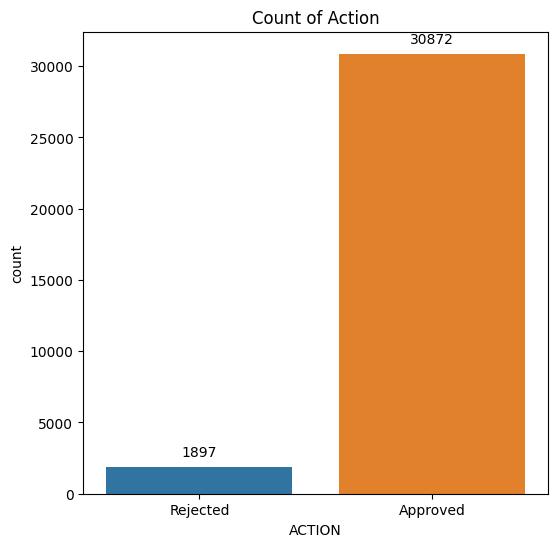

In [12]:

plt.figure(figsize=(6, 6))
ax = sns.countplot(x="ACTION", data=train_df)

# Loop through each bar and add the count number on top
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha="center", va="center", xytext=(0, 10), textcoords="offset points")

labels = [ "Rejected","Approved"]
ax.set_xticklabels(labels)
plt.title("Count of Action")

Most of the request is approved so the Dataset is Imbalance

In [13]:
approved=train_df[train_df['ACTION']==1]
rejected=train_df[train_df['ACTION']==0]

Text(0, 0.5, 'Prob_density')

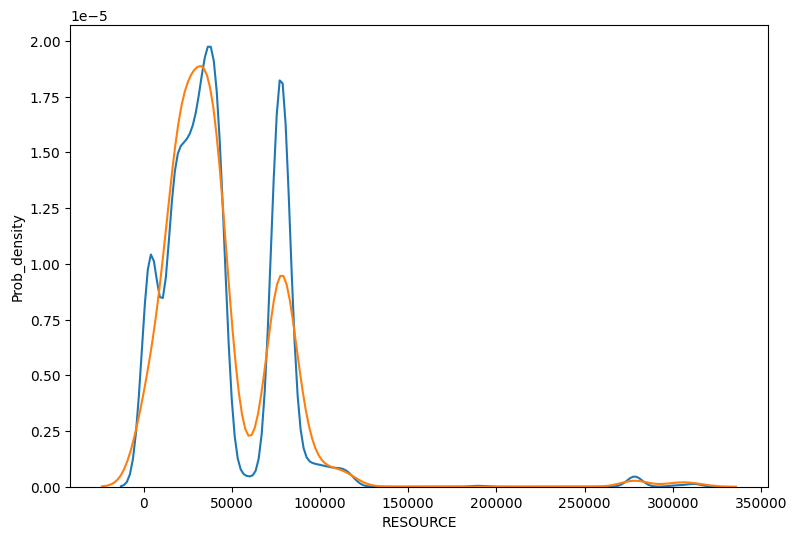

In [14]:
plt.figure(figsize=(9, 6))
sns.kdeplot(approved['RESOURCE'].values,label='Approved')
sns.kdeplot(rejected['RESOURCE'].values,label='rejected')
plt.xlabel('RESOURCE')
plt.ylabel('Prob_density')

Text(0, 0.5, 'Prob_density')

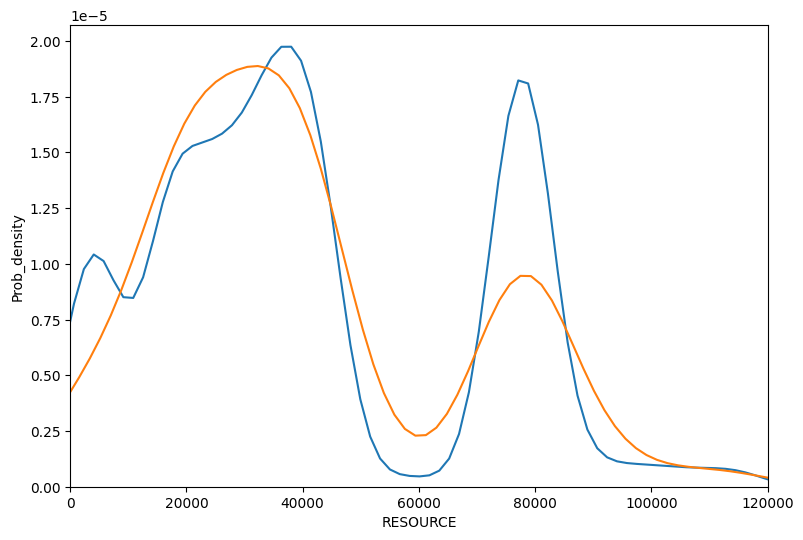

In [15]:
plt.figure(figsize=(9, 6))
sns.kdeplot(approved['RESOURCE'].values,label='Approved')
sns.kdeplot(rejected['RESOURCE'].values,label='rejected')
plt.xlim(0,120000)
plt.xlabel('RESOURCE')
plt.ylabel('Prob_density')

Density of approved request is higher in range 60000 to 90000

(0.0, 100000.0)

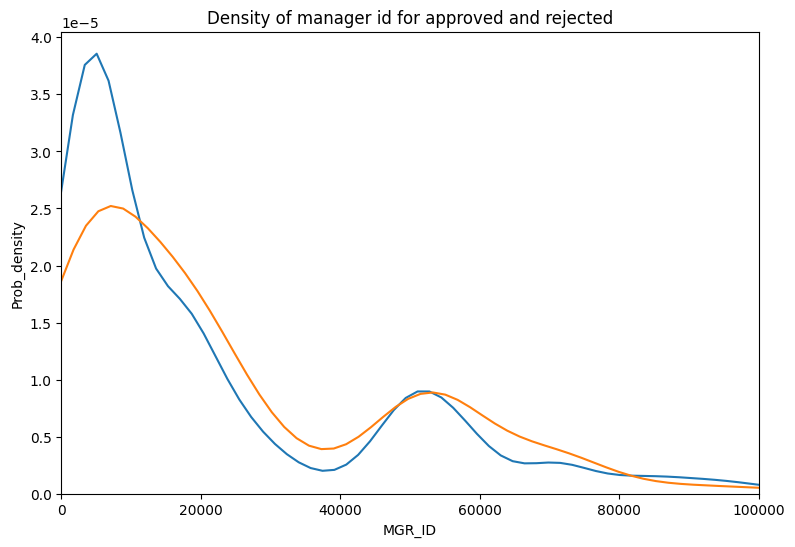

In [16]:
plt.figure(figsize=(9, 6))
plt.title("Density of manager id for approved and rejected")
sns.kdeplot(approved['MGR_ID'].values,label='Approved')
sns.kdeplot(rejected['MGR_ID'].values,label='Rejected')
plt.xlabel('MGR_ID')
plt.ylabel('Prob_density')
plt.xlim(0,100000)

It show that Manager id from 0-20000 has higher density of approval

(110000.0, 130000.0)

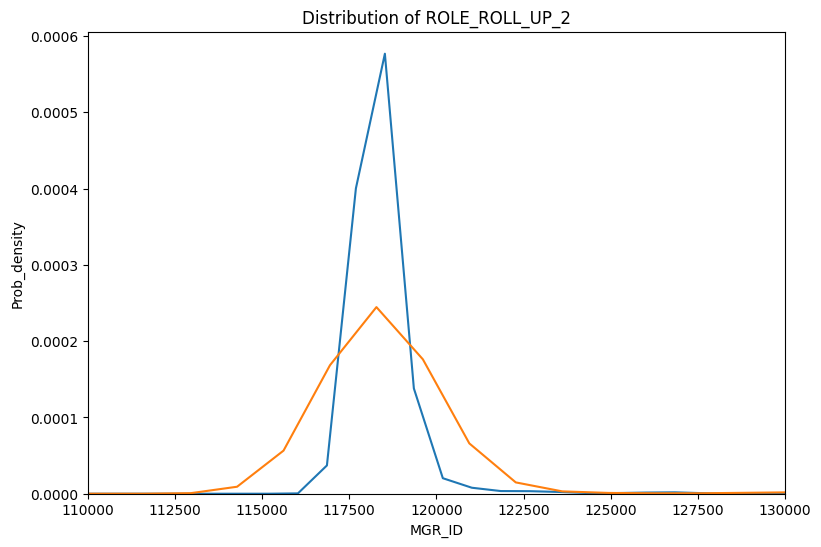

In [17]:
plt.figure(figsize=(9, 6))
plt.title("Distribution of ROLE_ROLL_UP_2")
sns.kdeplot(approved["ROLE_ROLLUP_2"].values,label='Approved')
sns.kdeplot(rejected["ROLE_ROLLUP_2"].values,label='Rejected')
plt.xlabel('MGR_ID')
plt.ylabel('Prob_density')
plt.xlim(110000,130000)

Text(0, 0.5, 'Prob_density')

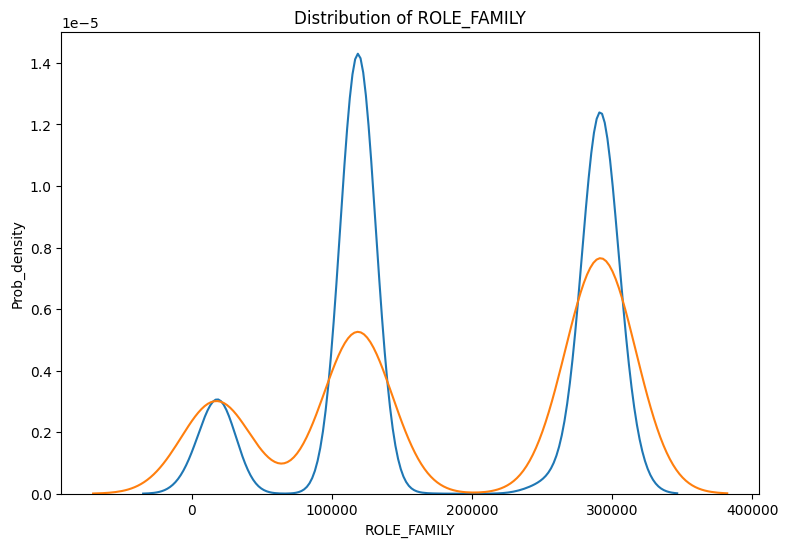

In [18]:
plt.figure(figsize=(9, 6))
plt.title("Distribution of ROLE_FAMILY")
sns.kdeplot(approved["ROLE_FAMILY"].values,label='Approved')
sns.kdeplot(rejected["ROLE_FAMILY"].values,label='Rejected')
plt.xlabel('ROLE_FAMILY')
plt.ylabel('Prob_density')
# plt.xlim(110000,130000)

This graph show two spikes where approved density is higher Than Rejected

Text(0, 0.5, 'Prob_density')

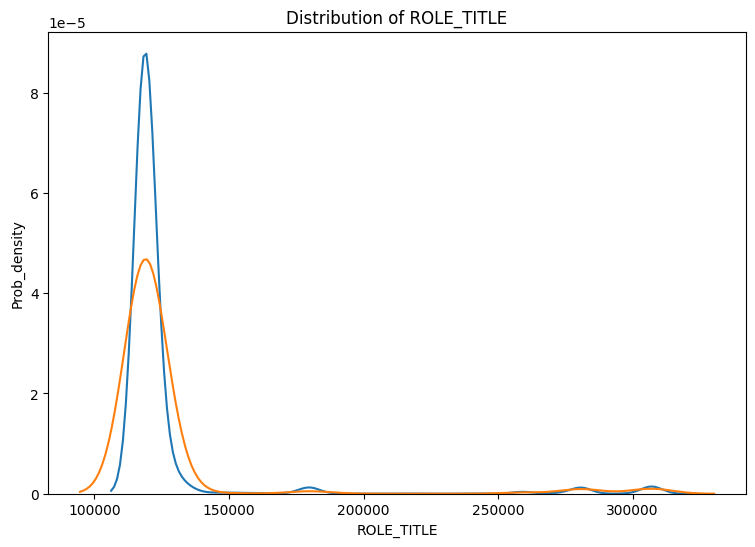

In [19]:
plt.figure(figsize=(9, 6))
plt.title("Distribution of ROLE_TITLE")
sns.kdeplot(approved["ROLE_TITLE"].values,label='Approved')
sns.kdeplot(rejected["ROLE_TITLE"].values,label='Rejected')
plt.xlabel('ROLE_TITLE')
plt.ylabel('Prob_density')
# plt.xlim(110000,130000)

Text(0, 0.5, 'Prob_density')

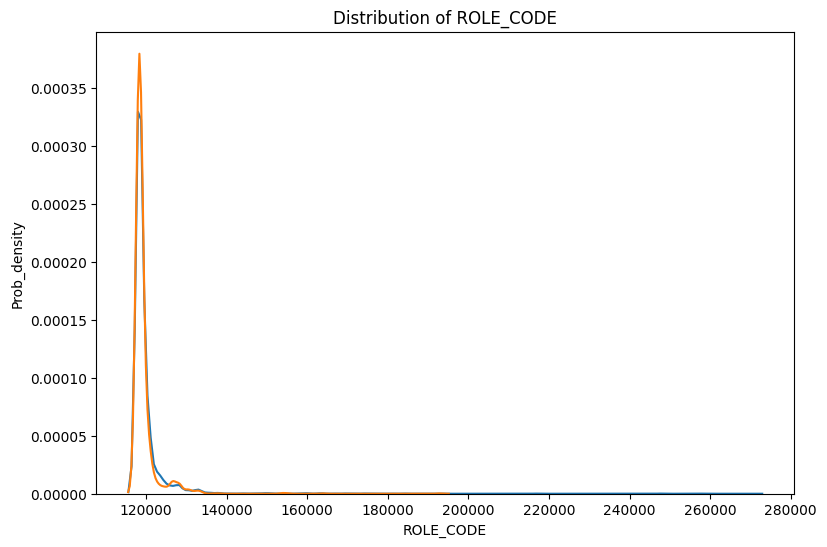

In [20]:
plt.figure(figsize=(9, 6))
plt.title("Distribution of ROLE_CODE")
sns.kdeplot(approved["ROLE_CODE"].values,label='Approved')
sns.kdeplot(rejected["ROLE_CODE"].values,label='Rejected')
plt.xlabel('ROLE_CODE')
plt.ylabel('Prob_density')
# plt.xlim(110000,130000)

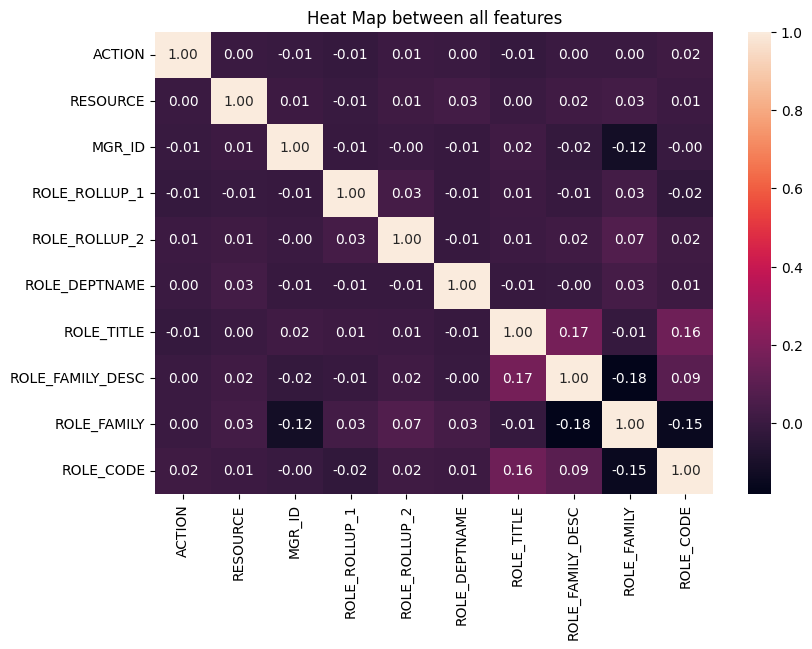

In [21]:
plt.figure(figsize=(9,6));
sns.heatmap(train_df.corr(),annot=True,fmt='.2f');
plt.title('Heat Map between all features');

In [24]:
train_df.columns

Index(['ACTION', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2',
       'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY',
       'ROLE_CODE'],
      dtype='object')

Majority of Columns has  no correlation.

<Figure size 1600x500 with 0 Axes>

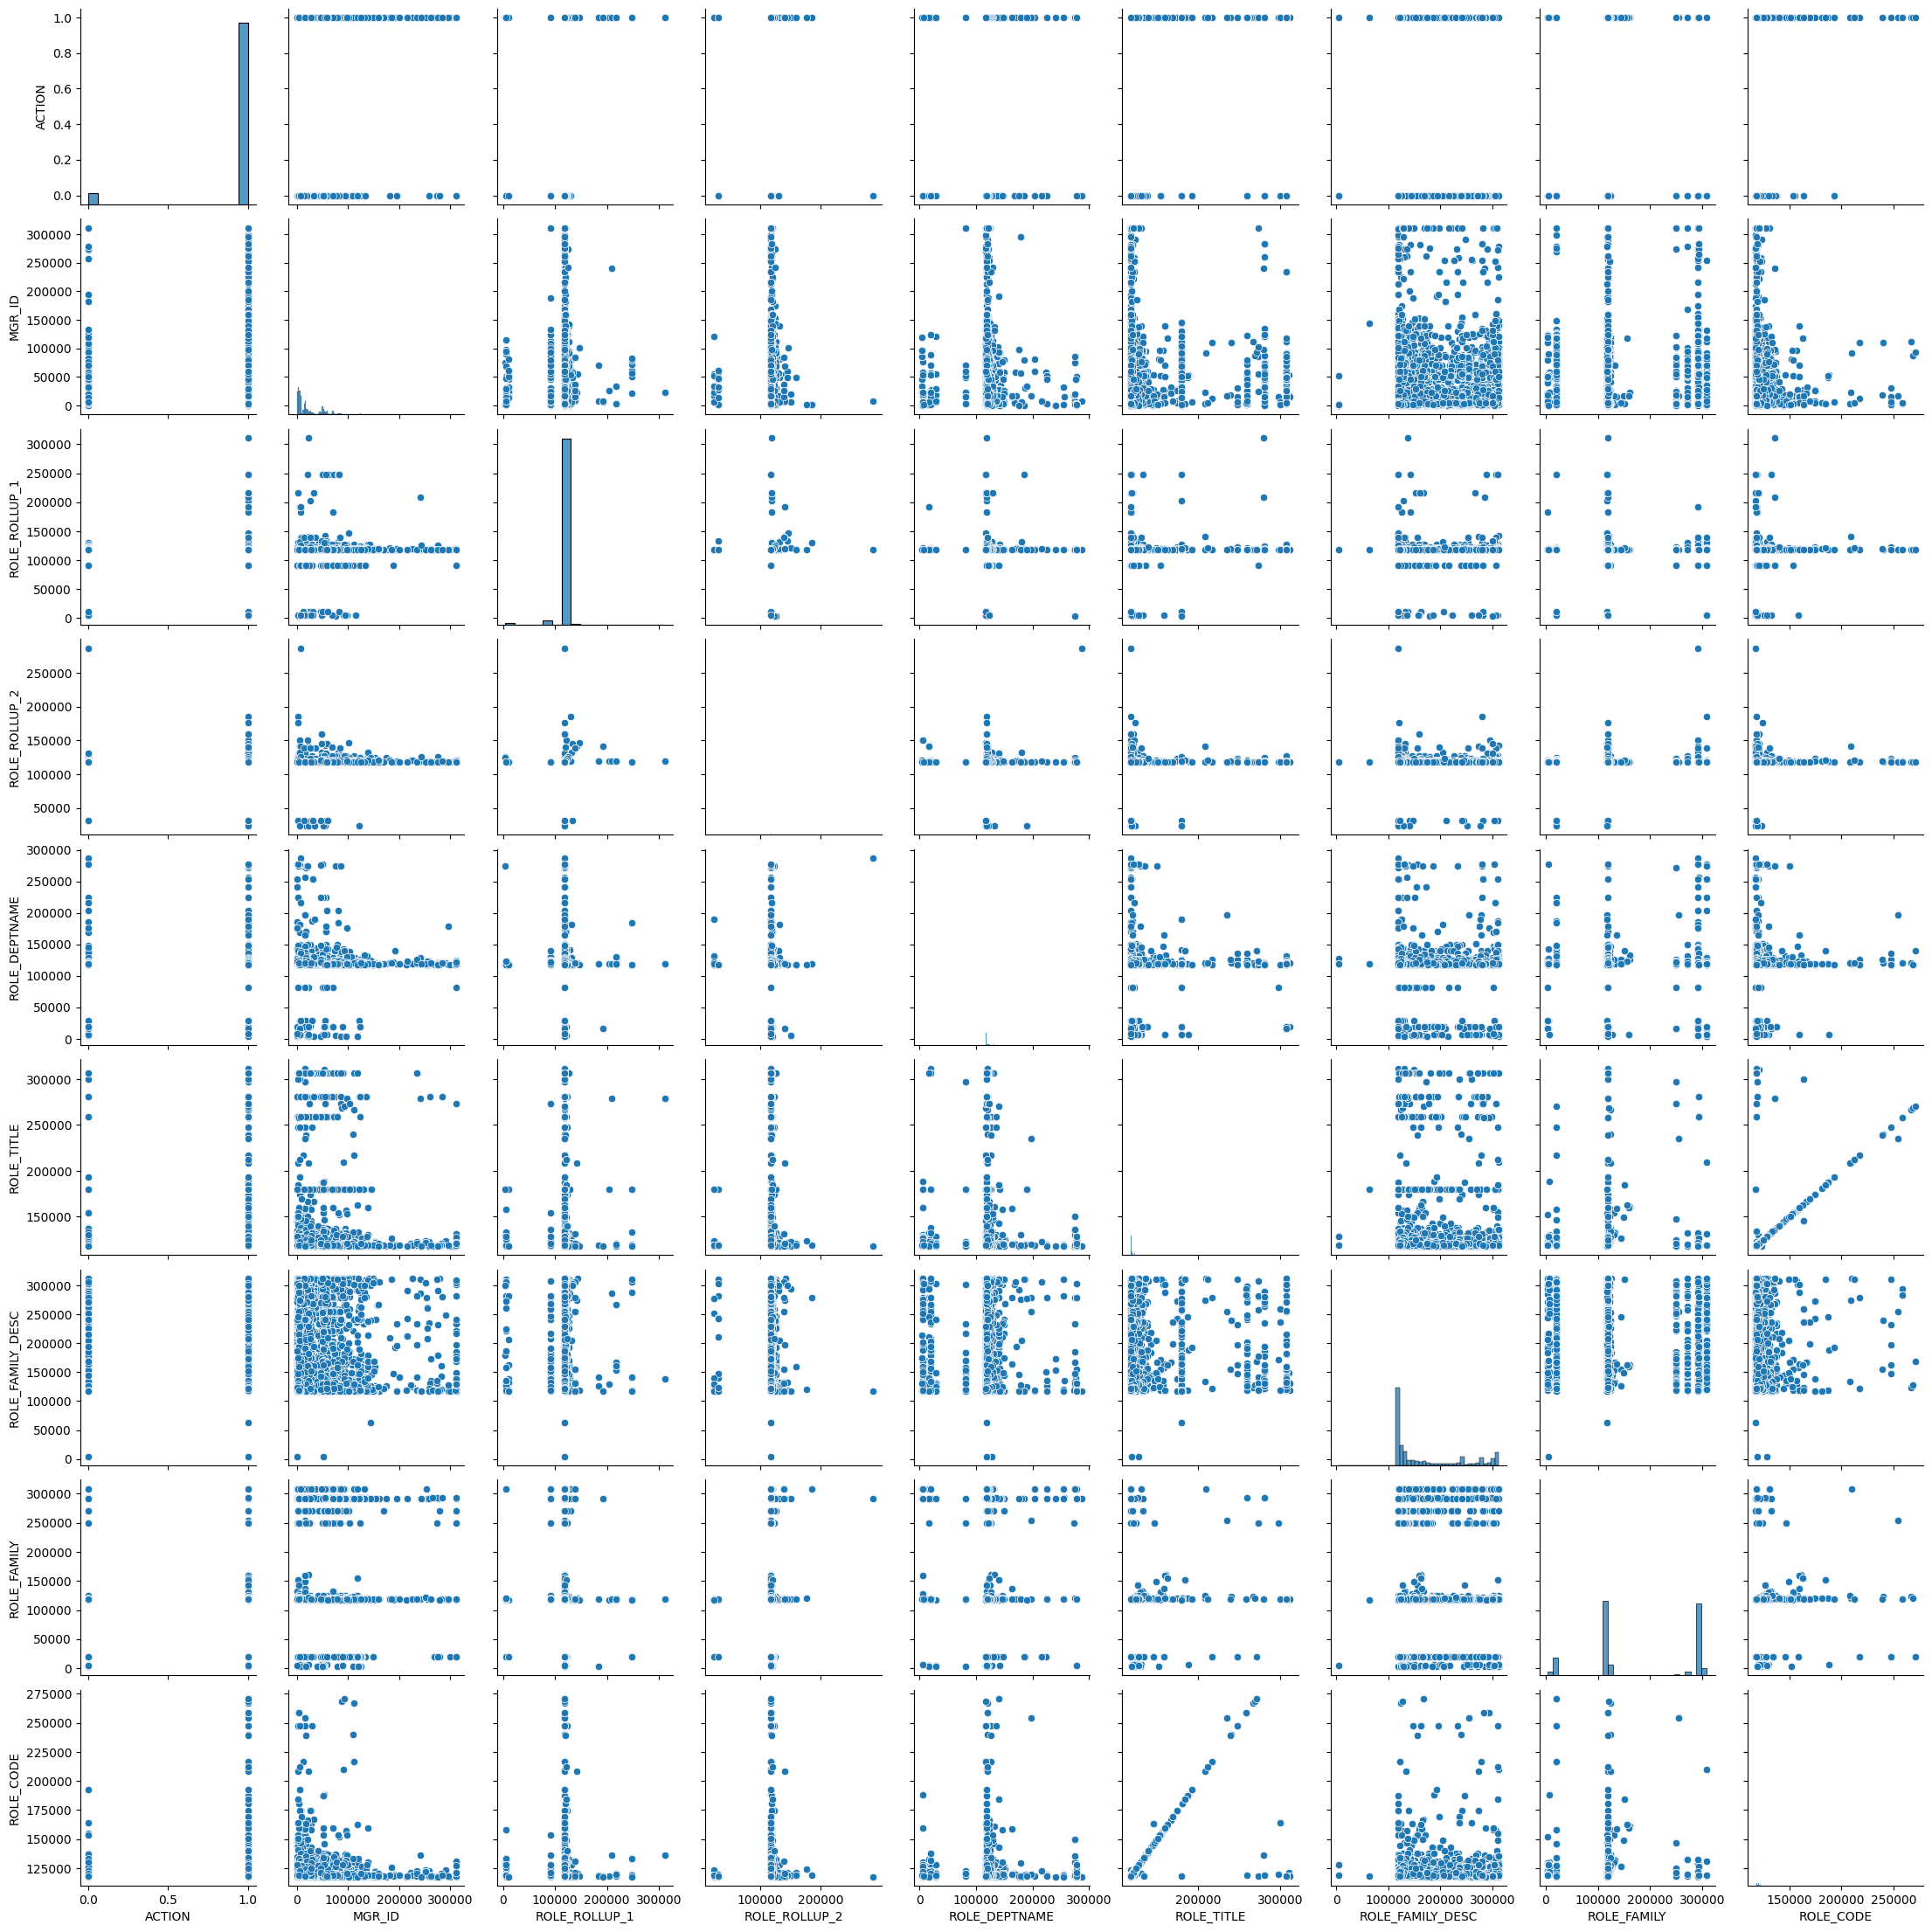

In [23]:
plt.figure(figsize=(16,5));
sns.pairplot(train_df[['ACTION','MGR_ID','ROLE_ROLLUP_1','ROLE_ROLLUP_2','ROLE_DEPTNAME','ROLE_TITLE','ROLE_FAMILY_DESC','ROLE_FAMILY','ROLE_CODE']]);